# Global mean Sea Surface Temperatures

**sst** - SST monthly mean (time: 492,lat: 720,lon: 1440)

**sst_Wmean** - SST weighted global mean (time)

**sst_Clim** - monthly climatology (month: 12lat: 720lon: 1440)

**sst_anom** - anomaly from monthly Climatology (time: 492, lat: 720,lon: 1440)

**sst_anom_Wmean** - SST anomlay weighted global mean (time: 492)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs
plt.rcParams['figure.figsize'] = (10, 4)

#### Settings

In [2]:
#To compute de climatoloy
year1='1982'
year2='1992'
year2='1984'

## Load data

In [3]:
base_file = '/Users/pvb/Dropbox/Oceanografia/Data/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
#base_file = '/data/shareddata/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
files = [f'{base_file}.{year}.nc' for year in range(1982, 1985)]
DS = xr.open_mfdataset(files)

In [4]:
DS. sst.time[-1]

<xarray.DataArray 'time' ()>
array('1984-12-31T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1984-12-31
Attributes:
    long_name:     Time
    delta_t:       0000-00-01 00:00:00
    avg_period:    0000-00-01 00:00:00
    axis:          T
    actual_range:  [66474. 66838.]

In [5]:
titulo_short = 'GO'
titulo = 'Global Ocean'
sst = DS.sst.sel(lat=slice( -88, 88))

#titulo_short = 'NH'
#titulo = 'Northern hemisphere'
#sst = sst.sst.sel(lat=slice(0,88))

#titulo_short = 'SH'
#titulo = 'Southern hemisphere'
#sst = sst.sst.sel(lat=slice( -88, 0))

### Resample data to 1 month

In [6]:
# Monthly mean
sst = sst.resample(time='1M').mean(dim='time',skipna=True).load()

## Global mean
(weigthed and unweigthed)

In [7]:
# Calculate global mean weigthtened
# For a rectangular grid the cosine of the latitude is proportional to the grid cell area.
weights = np.cos(np.deg2rad(sst.lat))
weights = weights/weights.max()
weights.name = "weights"
sst_weighted = sst.weighted(weights)
sst_wmean = sst_weighted.mean(("lon", "lat"),skipna=True).load()

## Seasonal cycle
Create seasonal climatology from 1982 to 1992 and the asociated anomaly

In [8]:
#Create monthly climatology
sst_clim = sst.sel(time=slice(year1,year2)).groupby('time.month').mean(dim='time').load();

In [9]:
#Create anomaly
sst_anom = sst.groupby('time.month') - sst_clim
sst_anom.load();

## Global mean anomaly

In [11]:
# Calculate global mean weigthtened
# For a rectangular grid the cosine of the latitude is proportional to the grid cell area.
weights = np.cos(np.deg2rad(sst.lat))
weights = weights/weights.max()
weights.name = "weights"
sst_anom_weighted = sst_anom.weighted(weights)
sst_anom_wmean = sst_anom_weighted.mean(("lon", "lat"),skipna=True).load()
sst_anom_wmean_rolling = sst_anom_wmean.rolling(time=12,center=True).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Mean Sea Surface Temperature in the Global Ocean')

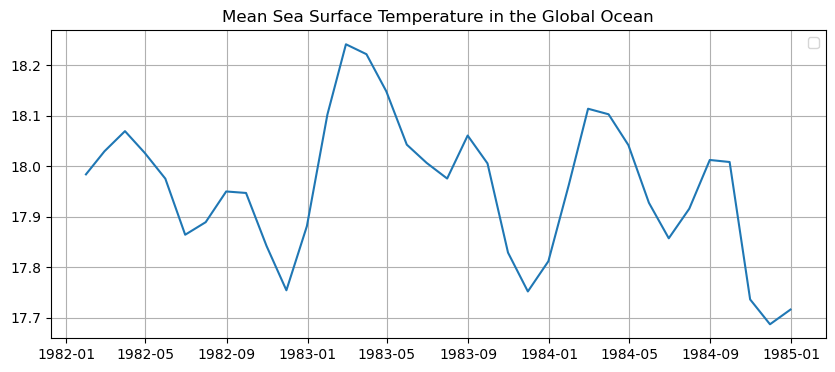

In [12]:
fig, ax = plt.subplots(1, 1 , figsize=(10,4))
ax.plot(sst_wmean.time,sst_wmean)
ax.grid()
ax.legend()
ax.set_title('Mean Sea Surface Temperature in the '+ titulo)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Mean Sea Surface Temperature anomaly in the Global Ocean\nAnomaly computed from 1982-1992')

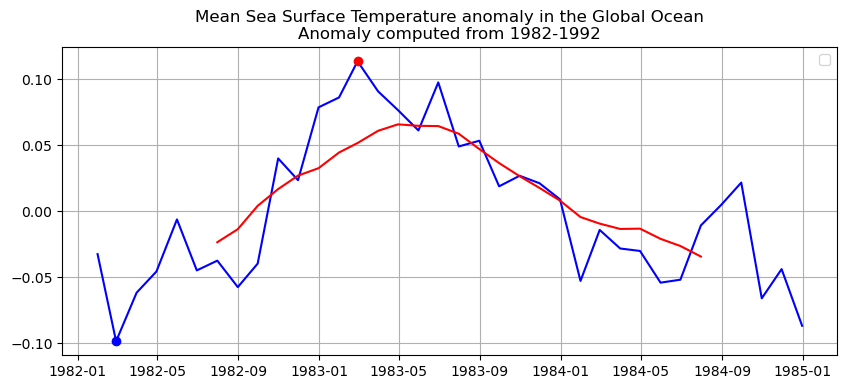

In [15]:
fig, ax = plt.subplots(1, 1 , figsize=(10,4))
ax.plot(sst_anom_wmean.time,sst_anom_wmean,'b')
ax.plot(sst_anom_wmean_rolling.time,sst_anom_wmean_rolling,'r')

ax.plot(sst_anom_wmean.time.isel(sst_anom_wmean.argmax(...)),
        sst_anom_wmean.isel(sst_anom_wmean.argmax(...)),'ro')
ax.plot(sst_anom_wmean.time.isel(sst_anom_wmean.argmin(...)),
        sst_anom_wmean.isel(sst_anom_wmean.argmin(...)),'bo')

ax.grid()
ax.legend()
ax.set_title('Mean Sea Surface Temperature anomaly in the '+ titulo + '\nAnomaly computed from 1982-1992')

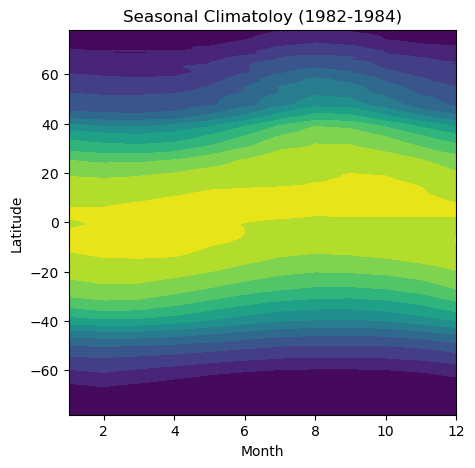

In [16]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(sst_clim.mean(dim='lon').month,
                 sst_clim.mean(dim='lon').lat,
                 sst_clim.mean(dim='lon').transpose(),levels=12, vmin=-2, vmax=30)
ax.set_ylim(-78,78)
ax.grid()
ax.set_title('Seasonal Climatoloy (' + year1 + '-' + year2 + ')')
ax.set_ylabel('Latitude') 
ax.set_xlabel('Month')
ax.grid()

In [17]:
sst.to_netcdf('./data/Psstm_'+titulo_short+'.nc',mode='w')

sst_anom.to_netcdf('./data/Psstm_anom_'+titulo_short+'.nc',mode='w')
sst_clim.to_netcdf('./data/Psstm_clim_'+titulo_short+'.nc',mode='w')

sst_wmean.to_netcdf('./data/Psstm_mean_'+titulo_short+'.nc',mode='w')
sst_anom_wmean.to_netcdf('./data/Psstm_anom_mean_'+titulo_short+'.nc',mode='w')

## Annex A

### Compare weigthtened and unweigthtened global means

In [ ]:
#Calculate global mean unweigthtened
sst_UWmean = sst.mean(dim='lon',skipna=True).mean(dim='lat',skipna=True).load()

In [ ]:
sst_Wmean.plot(label="weighted")
sst_UWmean.plot(label="unweighted")
plt.grid()
plt.legend()

### Canary Islands example

In [ ]:
sst_NorteTenerife = sst.sel(lon=360-16.1188,lat=28.5559,method='nearest').load()
sst_anom_NorteTenerife = sst_anom.sel(lon=345,lat=29,method='nearest').load()
sst_anom_NorteTenerife_rolling = sst_anom.sel(lon=345,lat=29,method='nearest').rolling(time=12,center=True).mean()
sst_NorteTenerife_Y = sst_NorteTenerife.resample(time='1Y').mean(dim='time',skipna=True)

In [ ]:
fig, ax = plt.subplots(1, 1 , figsize=(14,10))
ax.plot(sst_NorteTenerife.time,sst_NorteTenerife)
ax.grid()
ax.legend()
ax.set_title('Mean Sea Surface Temperature')

In [ ]:
fig, ax = plt.subplots(1, 1 , figsize=(14,10))
ax.plot(sst_NorteTenerife_Y.time,sst_NorteTenerife_Y)
ax.grid()
ax.legend()
ax.set_title('Mean yearly Seaa Surface Temperature')
ax.plot(sst_NorteTenerife_Y.time.isel(sst_NorteTenerife_Y.argmax(...)),
           sst_NorteTenerife_Y.isel(sst_NorteTenerife_Y.argmax(...)),'ro')
ax.plot(sst_NorteTenerife_Y.time.isel(sst_NorteTenerife_Y.argmin(...)),
           sst_NorteTenerife_Y.isel(sst_NorteTenerife_Y.argmin(...)),'bo')

In [ ]:
fig, ax = plt.subplots(1, 1 , figsize=(14,8))
ax.plot(sst_anom_NorteTenerife.time,sst_anom_NorteTenerife,'b')
ax.plot(sst_anom_NorteTenerife_rolling.time,sst_anom_NorteTenerife_rolling,'r')
ax.plot(sst_anom_NorteTenerife.time.isel(sst_anom_NorteTenerife.argmax(...)),
           sst_anom_NorteTenerife.isel(sst_anom_NorteTenerife.argmax(...)),'ro')
ax.plot(sst_anom_NorteTenerife.time.isel(sst_anom_NorteTenerife.argmin(...)),
           sst_anom_NorteTenerife.isel(sst_anom_NorteTenerife.argmin(...)),'bo')
ax.legend()
ax.grid()
ax.set_title('Mean Sea Surface Temperature anomaly');